# Lyric Analyzer

## 1. Prepare dataset
### 1. Open dataset
This dataset was downloaded from
https://www.kaggle.com/artimous/every-song-you-have-heard-almost

In [27]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('../dataset/Lyrics1.csv')
df2 = pd.read_csv('../dataset/Lyrics2.csv')
df = df1.append(df2)
#release memory
del df1, df2

df

,Band,Lyrics,Song
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds
5,Elijah Blake,I just want to ready your mind\r\n'Cause I'll ...,Uno
6,Elijah Harris,To believe\r\nOr not to believe\r\nThat is the...,Girlfriend (Main)
7,Elijah Levi,"No one here can love or understand me\r\nOh, w...",Bye Bye Blackbird
8,Elijah Levi,"Lullaby of Birdland, that's what I \r\nAlways ...",Lullaby of Birdland
9,Elijah Levi,I hate to see that evening sun go down\r\nI ha...,St. Louis Blues


In [2]:
artists = df.Band.unique()
print("Unique artists: ", artists.size)

#http://cmdlinetips.com/2018/01/how-to-add-a-new-column-to-using-a-dictionary-in-pandas-data-frame/

Unique artists:  42627


### 2. Tag artists with genres
To get the genres of every artist use Spotify api at https://api.spotify.com/v1/.

Save a csv file with two columns:
* Band: the name of the band
* Genres: an array with the artist's genres

In [4]:
%%script skip
import requests
token = 'BQBWR7j8rLSM3lTkFafP3DDO0VjzsLWVtQg2rL5LdQm-5jCZu30_XKOCrS5YmdiXUQ3f73P24Y26uYqQAPxloEnG2I1XkMIATMRKqGk2NkD-p7Cb8W4VyY8pToJGzA8lgVOpxtDgi6fYUJtLgSGfG4eFFQ'
url = 'https://api.spotify.com/v1/search'
headers = {'Accept': 'application/json', 'Content-Type':'application/json', 'Authorization':'Bearer '+token}

artist_genres = []
artist_no_genres = set([])

for i in range(32676, artists.size):#artists.size
    if(i%10 == 0):
        print("\r{0}".format(i), end="\r")
    artist=artists[i]
    params = {'q': artist, 'type': 'artist', 'limit':'1'}   
    response = requests.get(url, params=params, headers=headers)
    if(response.ok):
        jData= response.json()
        if(jData['artists']['items'] and jData['artists']['items'][0]['genres']):
            a = {}
            a['name'] = artist
            a['genres'] = jData['artists']['items'][0]['genres']
            artist_genres.append(a)
            pd.DataFrame([a]).to_csv('../dataset/artists.csv', index=False, mode='a', header=False)
        else:
            artist_no_genres.add(artist)
    else:
        print("Crashed at index ", i)
        response.raise_for_status()
        
print("Artists found: ", len(artist_genres))
print("Artists not found: ", len(artist_no_genres))

Couldn't find program: 'skip'


In [30]:
import ast
import pandas as pd

df = pd.read_csv('../dataset/artists.csv')
df

,Genres,Band
0,"['deep pop r&b', 'indie r&b', 'r&b', 'trap soul']",Elijah Blake
1,"['europop', 'swedish pop']",Elin Lanto
2,"['italian indie pop', 'italian pop']",Elio e le Storie Tese
3,['pop reggaeton'],Elis
4,"['bossa nova', 'forro', 'mpb', 'samba']",Elis Regina
5,"['italian arena pop', 'italian pop']",Elisa
6,['french pop'],Elisa Tovati
7,['classic norwegian pop'],Elisabeth Andreasson
8,['deep vocal jazz'],Elisabeth Lohninger
9,['neo soul'],Elisabeth Withers


In [31]:
import ast 

unique_genres = set([])
for i, row in df.iterrows():
    try:
        artist_genres = ast.literal_eval(row['Genres'])
    except:
        artist_genres = list(row['Genres'])
    new_artist_genres = set([])
    for artist_genre in artist_genres:
        splited_genres = artist_genre.split(" ")
        for genre in splited_genres:
            new_artist_genres.add(genre)
            unique_genres.add(genre)
    df.at[i, 'Genres'] = list(new_artist_genres)
print("Unique genres: ", len(unique_genres))
df.to_csv('../dataset/artists_flat_genres.csv', index=False)
df.head()

Unique genres:  1084


,Genres,Band
0,"[indie, soul, trap, pop, deep, r&b]",Elijah Blake
1,"[pop, swedish, europop]",Elin Lanto
2,"[italian, pop, indie]",Elio e le Storie Tese
3,"[pop, reggaeton]",Elis
4,"[samba, mpb, forro, bossa, nova]",Elis Regina


### 3. One Hot Encode genres

In [32]:
ohe_df = pd.get_dummies(df.Genres.apply(pd.Series).stack()).sum(level=0)
final_df = pd.concat([df, ohe_df], axis=1).drop(['Genres'], axis=1)
final_df.to_csv('../dataset/artists_one_hot_encoded_genres.csv', index=False)

del ohe_df
del df

final_df['pop'].head()


0    1
1    1
2    1
3    1
4    0
Name: pop, dtype: uint8

In [33]:
genres = final_df.drop('Band', axis=1).sum()
print(genres.describe())

items = genres.iteritems()
to_remove = set()
for i,item in items:
    if item < 10:
        to_remove.add(i)
print("Columns to remove: ",len(to_remove))
genres.sort_values().plot()

count    1084.000000
mean       93.090406
std       304.121378
min         1.000000
25%         4.000000
50%        17.000000
75%        71.000000
max      5790.000000
dtype: float64
Columns to remove:  438


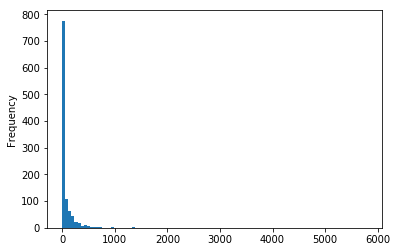

In [34]:
genres.plot.hist(bins=100)

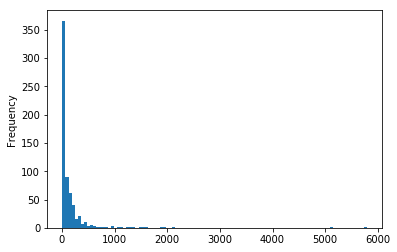

In [6]:
genres = genres.drop(labels=to_remove)
genres.plot.hist(bins=100)

count    1084.000000
mean       93.090406
std       304.121378
min         1.000000
25%         4.000000
50%        17.000000
75%        71.000000
max      5790.000000
dtype: float64


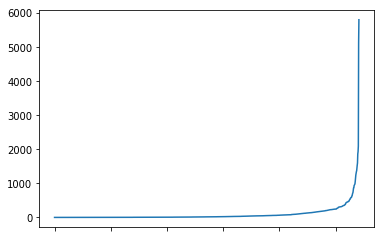

In [37]:
print(genres.describe())
genres.sort_values().plot()

In [35]:
final_df = pd.read_csv('../dataset/artists_one_hot_encoded_genres.csv')
final_df = final_df.drop(labels=to_remove, axis=1)
for row in final_df.itertuples():
    if (sum(row[2:]) == 0):
        final_df.drop(row[0], inplace=True)
        
final_df.to_csv('../dataset/artists_final_ohe.csv', index=False)
final_df

,Band,'n,a,abstract,accordion,acid,acoustic,adoracao,adult,african,...,western,wonky,world,worship,wrestling,ye,zapstep,zolo,zouk,zydeco
0,Elijah Blake,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Elin Lanto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Elio e le Storie Tese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Elis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Elis Regina,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Elisa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Elisa Tovati,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Elisabeth Andreasson,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Elisabeth Lohninger,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Elisabeth Withers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Delete non english lyrics


In [2]:
import pandas as pd
from langdetect import detect
from langdetect import DetectorFactory 
DetectorFactory.seed = 0

df1 = pd.read_csv('../dataset/Lyrics1.csv')
df2 = pd.read_csv('../dataset/Lyrics2.csv')
df = df1.append(df2)
#release memory
del df1, df2

to_remove = set()
for row in df.itertuples(index=True, name='Pandas'):
    lyric = getattr(row, "Lyrics")
    index = getattr(row, "Index")
    try:
        if detect(lyric) != 'en':
            to_remove.add(index)
            #df.drop(index, inplace=True)            
    except:
        pass

df = df.drop(labels=to_remove)
print("Lyrics dropped ", len(to_remove))
df.to_csv('../dataset/Lyrics_en.csv', index=False)
df.head()

Lyrics dropped  56604


,Band,Lyrics,Song
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds


### 5. Delete lyrics without genre tags

In [3]:
import pandas as pd
df = pd.read_csv('../dataset/Lyrics_en.csv')
final_df = pd.read_csv('../dataset/artists_final_ohe.csv')

to_remove = set()
for index,row in df.iterrows():
    if(df['Band'].loc[index] not in final_df['Band'].values):
        to_remove.add(index)

df = df.drop(labels=to_remove)
df.to_csv('../dataset/Lyrics_en.csv', index=False)
df

,Band,Lyrics,Song
0,Elijah Blake,"No, no\r\r\nI ain't ever trapped out the bando...",Everyday
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die
2,Elijah Blake,She don't live on planet Earth no more\r\r\nSh...,The Otherside
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds
5,Elijah Blake,I just want to ready your mind\r\r\n'Cause I'l...,Uno
12,Elin Lanto,I watch the leaves fall to the ground\r\r\nSud...,As Long as I Can Dream
14,Elio e le Storie Tese,"When I was just a boy,\r\r\nEveryone made fun ...",John Holmes
16,Elis,"[bonus track]\r\n\r\nBetrayal, you betrayed me...",Betrayal
17,Elis,A child is born\r\r\nOut of the womb of a moth...,Child


### 6. Delete duplicates

In [4]:
lyrics = pd.read_csv('../dataset/Lyrics_en.csv', index_col=['Band','Song'])
genres = pd.read_csv('../dataset/artists_final_ohe.csv', index_col=['Band'])

lyrics = lyrics[~lyrics.index.duplicated(keep='first')]
genres = genres[~genres.index.duplicated(keep='first')]

lyrics.to_csv('../dataset/Lyrics_en.csv')
genres.to_csv('../dataset/artists_final_ohe.csv')

### 7. Delete line breaks

In [5]:
import re

df = pd.read_csv('../dataset/Lyrics_en.csv')
#df = df.iloc[0:100]
df.dropna(axis='index', how='any', inplace=True)


for row in df.itertuples(index=True, name='Pandas'):
    lyric = getattr(row, "Lyrics")
    index = getattr(row, "Index")
    lyric = re.sub('\s+', ' ', lyric)
    lyric = re.sub("\'", "", lyric)
    lyric = re.sub("\"", "", lyric)
    df.at[index, 'Lyrics'] = lyric
df.to_csv('../dataset/Lyrics_en_clean.csv', index=False)
df

,Band,Song,Lyrics
0,Elijah Blake,Everyday,"No, no I aint ever trapped out the bando But o..."
1,Elijah Blake,Live Till We Die,"The drinks go down and smoke goes up, I feel m..."
2,Elijah Blake,The Otherside,She dont live on planet Earth no more She foun...
3,Elijah Blake,Pinot,"Trippin off that Grigio, mobbin, lights low Tr..."
4,Elijah Blake,Shadows & Diamonds,"I see a midnight panther, so gallant and so br..."
5,Elijah Blake,Uno,I just want to ready your mind Cause Ill still...
6,Elin Lanto,As Long as I Can Dream,I watch the leaves fall to the ground Suddenly...
7,Elio e le Storie Tese,John Holmes,"When I was just a boy, Everyone made fun of me..."
8,Elis,Betrayal,"[bonus track] Betrayal, you betrayed me You be..."
9,Elis,Child,A child is born Out of the womb of a mother Wh...
